In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
datos = pd.read_csv('clean_data.csv')

In [3]:
datos.head()

,clump_thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class_benign,class_malignant
0,5,1,1,1,2,1,3,1,1,1,0
1,5,4,4,5,7,10,3,2,1,1,0
2,3,1,1,1,2,2,3,1,1,1,0
3,6,8,8,1,3,4,3,7,1,1,0
4,4,1,1,3,2,1,3,1,1,1,0


In [4]:
datos.tail()

,clump_thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class_benign,class_malignant
670,3,1,1,1,3,2,1,1,1,1,0
671,2,1,1,1,2,1,1,1,1,1,0
672,5,10,10,3,7,3,8,10,2,0,1
673,4,8,6,4,3,4,10,6,1,0,1
674,4,8,8,5,4,5,10,4,1,0,1


In [5]:
datos.isnull()

,clump_thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class_benign,class_malignant
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
670,False,False,False,False,False,False,False,False,False,False,False
671,False,False,False,False,False,False,False,False,False,False,False
672,False,False,False,False,False,False,False,False,False,False,False
673,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

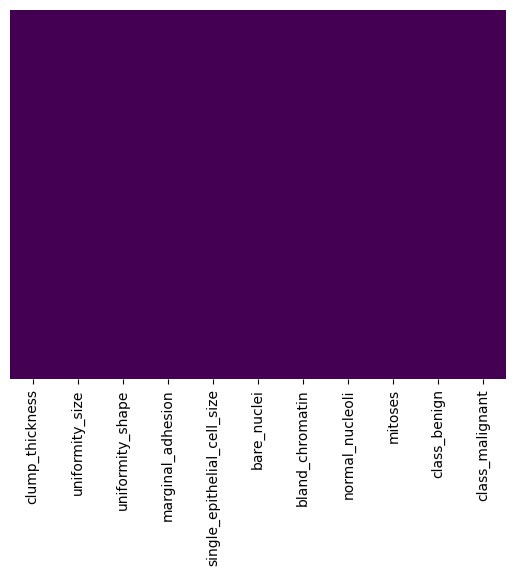

In [6]:
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='class_benign', ylabel='count'>

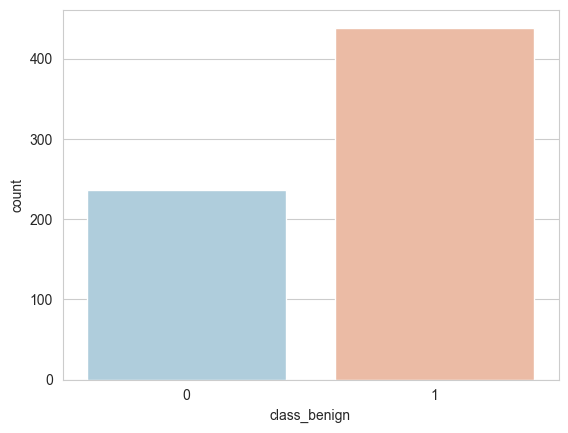

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'class_benign', data = datos, palette = 'RdBu_r')

In [8]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(datos.drop('class_benign' , axis = 1), 
                                                    datos['class_benign'], test_size = 0.30, 
                                                    random_state = 101)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
modeloLog = LogisticRegression(max_iter = 500)
modeloLog.fit(X_entreno,y_entreno)

LogisticRegression(max_iter=500)

In [11]:
predicciones = modeloLog.predict(X_prueba)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      1.00       127

    accuracy                           1.00       203
   macro avg       0.99      1.00      0.99       203
weighted avg       1.00      1.00      1.00       203



In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
confusion_matrix(y_prueba,predicciones)

array([[ 76,   0],
       [  1, 126]])

In [16]:
accuracy_score(y_prueba, predicciones)

0.9950738916256158